# TMDb movie data

## Analysis by: Aminat Owodunni

**Overview**\
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#checking for duplicates
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

1

In [7]:
#dropping duplicates data
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(10865, 21)

# Exploratory Data Analysis (EDA)

**Which genres are most popular from year to year?**

In [9]:
df['genres'].describe()

count      10842
unique      2039
top       Comedy
freq         712
Name: genres, dtype: object

The most frequent genres was **comedy** with a count of **712**.

In [10]:
# popular genres
df[['release_year','genres','popularity']].sort_values(['popularity'],ascending=True)

,release_year,genres,popularity
6181,1985,Drama|History|Western,0.000065
9977,1971,Mystery|Comedy|Drama,0.000188
6080,2013,Comedy,0.000620
6551,2005,Comedy|Mystery,0.000973
6961,2006,Comedy,0.001115
...,...,...,...
2,2015,Adventure|Science Fiction|Thriller,13.112507
630,2014,Action|Science Fiction|Adventure,14.311205
629,2014,Adventure|Drama|Science Fiction,24.949134
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936


In [11]:
#Top 50 polular genres/movies in the nineties
df_19gm = df[df['release_year']<=1999]
df_19gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(50)

,release_year,original_title,genres,popularity
1329,1977,Star Wars,Adventure|Action|Science Fiction,12.037933
2409,1999,Fight Club,Drama,8.947905
4177,1994,Pulp Fiction,Thriller|Crime,8.093754
2410,1999,The Matrix,Action|Science Fiction,7.753899
4178,1994,The Shawshank Redemption,Drama|Crime,7.192039
4179,1994,Forrest Gump,Comedy|Drama|Romance,6.715966
5230,1997,Eddie Izzard: Glorious,Comedy,6.668990
6081,1985,Back to the Future,Adventure|Comedy|Science Fiction|Family,6.095293
7269,1972,The Godfather,Drama|Crime,5.738034
7309,1980,The Empire Strikes Back,Adventure|Action|Science Fiction,5.488441


<AxesSubplot:title={'center':'Popularity Score of Top 50 movies in the nineties'}, xlabel='original_title'>

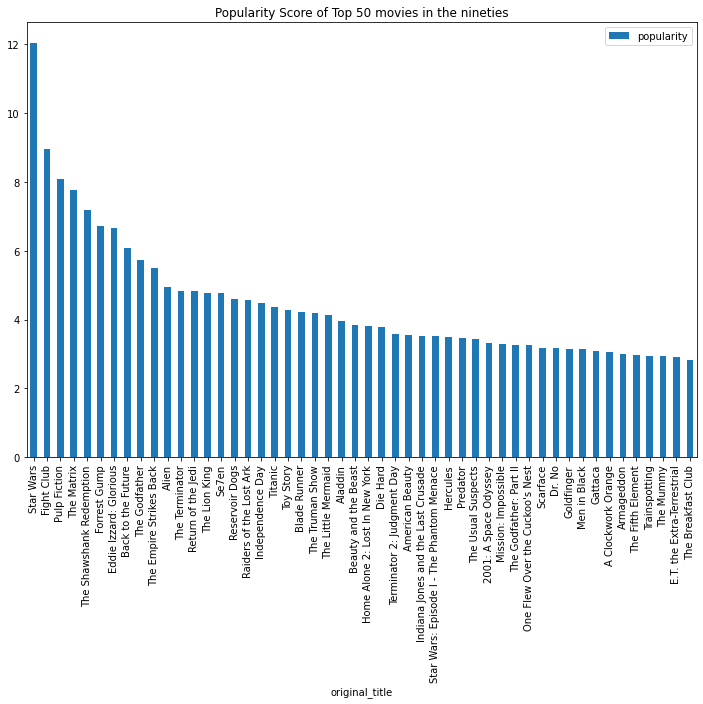

In [12]:
#Chart of Top 50 polular genres/movies in the nineties
df_19gm = df[df['release_year']<=1999]
df_19gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(50).plot(x='original_title', y='popularity', kind='bar', title = 'Popularity Score of Top 50 movies in the nineties', figsize=(12,8))

The most popular genres are in the nineties are; **Action|Adventure|Science Fiction movies.** \ **Star Wars**, a movie, released in **1977** was the most popular with a score of **12.037933**

In [13]:
# Top 50 polular genres/movies in the millineum
df_20gm = df[df['release_year']>1999]
df_20gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(50)

,release_year,original_title,genres,popularity
0,2015,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,28.419936
629,2014,Interstellar,Adventure|Drama|Science Fiction,24.949134
630,2014,Guardians of the Galaxy,Action|Science Fiction|Adventure,14.311205
2,2015,Insurgent,Adventure|Science Fiction|Thriller,13.112507
631,2014,Captain America: The Winter Soldier,Action|Adventure|Science Fiction,12.971027
632,2014,John Wick,Action|Thriller,11.422751
3,2015,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,11.173104
633,2014,The Hunger Games: Mockingjay - Part 1,Science Fiction|Adventure|Thriller,10.739009
634,2014,The Hobbit: The Battle of the Five Armies,Adventure|Fantasy,10.174599


<AxesSubplot:title={'center':'Popularity Score of Top 50 Movies in the Millennium'}, xlabel='original_title'>

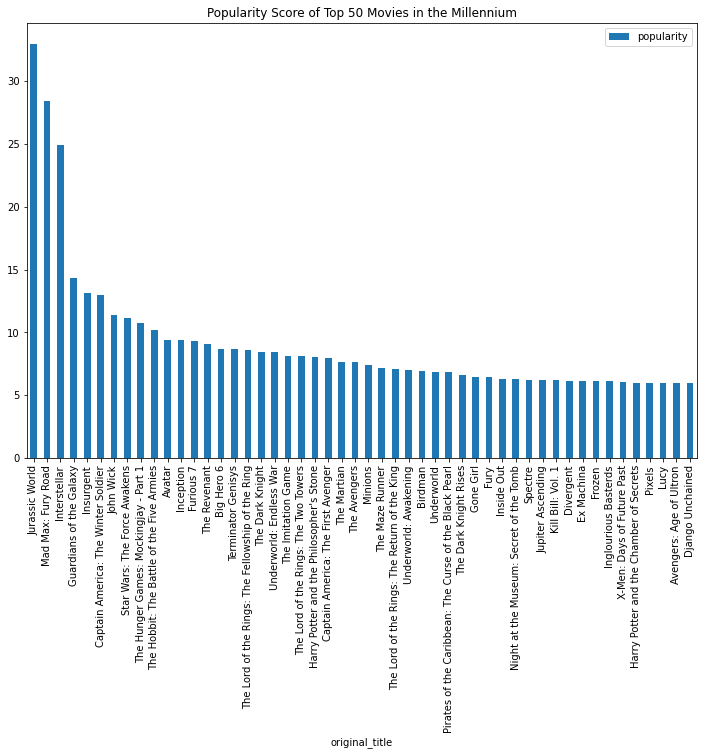

In [14]:
# Top 50 polular genres/movies in the millineum
df_20gm = df[df['release_year']>1999]
df_20gm[['release_year','original_title','genres','popularity']].sort_values(['popularity'],ascending=False).head(50).plot(x='original_title', y='popularity', kind='bar', title = 'Popularity Score of Top 50 Movies in the Millennium', figsize=(12,8))

Top popular genres/movies in the millineum are: **Action|Adventure|Science Fiction|Thriller.**\ **Jurassic world**, released in **2015** was the most popular with a score of **32.985763**

In [15]:
#Top 50 rated movies in the nineties
df_19m_rt = df[df['release_year']<=1999]
df_19m_rt[['release_year','original_title','genres','vote_average']].sort_values(['vote_average'],ascending=False).head(50)

,release_year,original_title,genres,vote_average
8411,1981,Queen - Rock Montreal,Music,8.5
8221,1995,A Personal Journey with Martin Scorsese Throug...,Documentary,8.5
4178,1994,The Shawshank Redemption,Drama|Crime,8.4
7948,1984,Stop Making Sense,Documentary|Music,8.4
9290,1989,Depeche Mode: 101,Music,8.4
8370,1992,Bill Hicks: Relentless,Comedy,8.4
7269,1972,The Godfather,Drama|Crime,8.3
6176,1985,Shoah,Documentary,8.3
9315,1989,For All Mankind,Documentary,8.2
2409,1999,Fight Club,Drama,8.1


<AxesSubplot:title={'center':'Top 50 nineties Movies Average Rating'}, xlabel='original_title'>

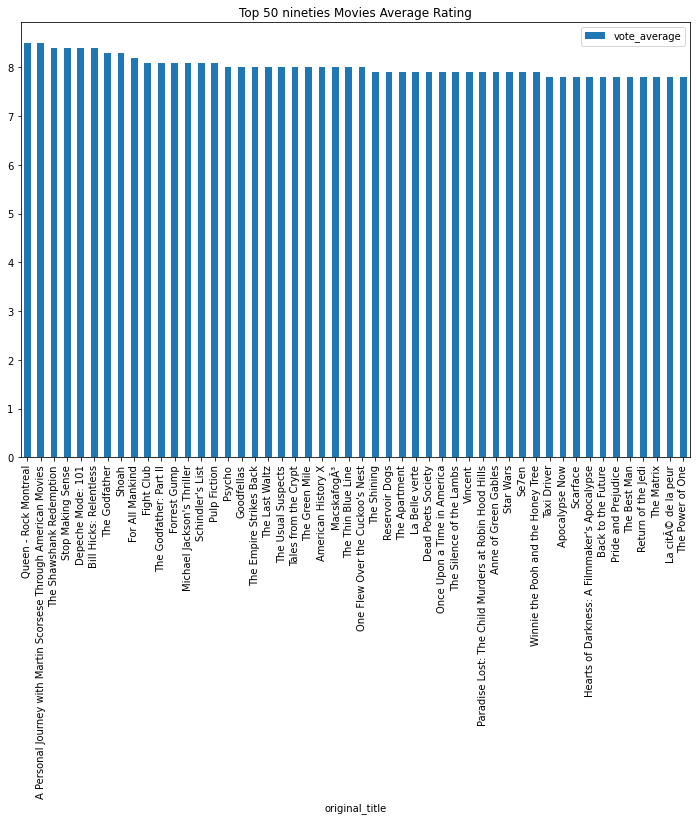

In [16]:
#Bar Chart of Top 50 rated movies in the nineties
df_19Topm_rt = df_19m_rt[['original_title','vote_average']].sort_values(['vote_average'],ascending=False).head(50)
df_19Topm_rt.plot(x='original_title', y='vote_average', kind='bar', title = 'Top 50 nineties Movies Average Rating', figsize=(12,8))

Top rated genres in the nineties are movies of the category: **Documentary, Music, Drama, Crime**. The two most rated movies are; **Queen _ Rock Montreal released in 1981** and **A Personal Journey with Martin Scorsese released in 1995** both with average rating of **8.5.**

In [17]:
#Top 50 rated movies in the millenium
df_20m_rt = df[df['release_year']>1999]
df_20m_rt[['release_year','original_title','genres','vote_average']].sort_values(['vote_average'],ascending=False).head(50)

,release_year,original_title,genres,vote_average
3894,2011,The Story of Film: An Odyssey,Documentary,9.2
538,2015,The Mask You Live In,Documentary,8.9
1200,2014,Black Mirror: White Christmas,Drama|Horror|Mystery|Science Fiction|Thriller,8.8
2269,2010,Life Cycles,Documentary,8.8
6911,2006,Pink Floyd: Pulse,Music,8.7
2401,2010,Opeth: In Live Concert At The Royal Albert Hall,Music,8.6
3690,2011,The Art of Flight,Adventure|Documentary,8.5
5830,2013,Doctor Who: The Time of the Doctor,NaN,8.5
8839,2000,Dave Chappelle: Killin' Them Softly,Comedy,8.5
3224,2008,John Mayer: Where the Light Is Live in Los Ang...,Music,8.5


<AxesSubplot:title={'center':' Top 50 Millennium Movies Average Rating'}, xlabel='original_title'>

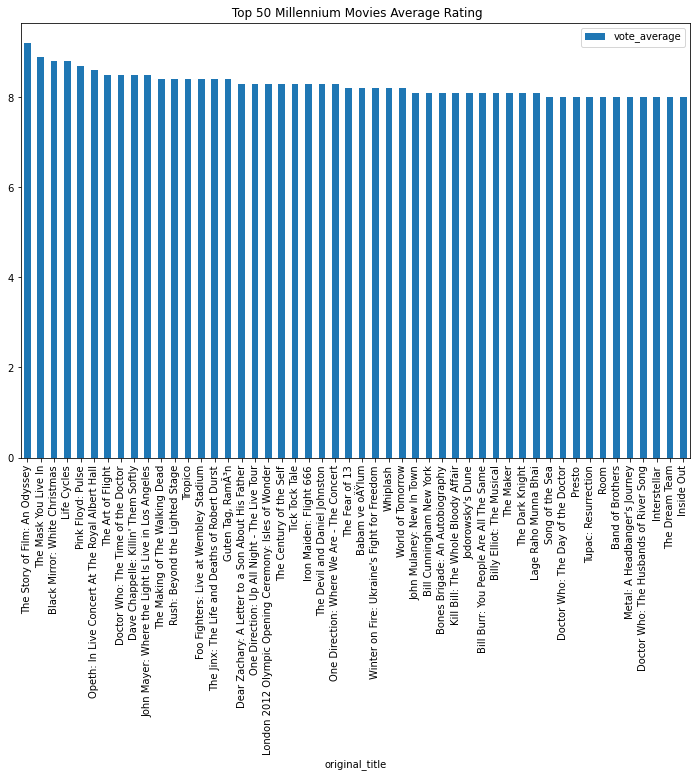

In [18]:
#Bar Chart of Top 50 rated movies in the milennium
df_20Topm_rt = df_20m_rt[['original_title','vote_average']].sort_values(['vote_average'],ascending=False).head(50)
df_20Topm_rt.plot(x='original_title', y='vote_average', kind='bar', title = ' Top 50 Millennium Movies Average Rating', figsize=(12,8))

Top rated movies in the millennium are movies of category: **Drama, Horror, Mystery, Science Fiction, Thriller, Documentary**. The most rated movie of the millennium is **The Story of Film: An Odyssey** released in **2011** with an average rating of **9.2**

 **What kinds of properties are associated with movies that have high revenues?**

In [19]:
# Top 50 movies of high revenue
df[['genres','original_title','vote_average','revenue_adj','production_companies']].sort_values(['revenue_adj'],ascending=False).head(50)

,genres,original_title,vote_average,revenue_adj,production_companies
1386,Action|Adventure|Fantasy|Science Fiction,Avatar,7.1,2.827124e+09,Ingenious Film Partners|Twentieth Century Fox ...
1329,Adventure|Action|Science Fiction,Star Wars,7.9,2.789712e+09,Lucasfilm|Twentieth Century Fox Film Corporation
5231,Drama|Romance|Thriller,Titanic,7.3,2.506406e+09,Paramount Pictures|Twentieth Century Fox Film ...
10594,Drama|Horror|Thriller,The Exorcist,7.2,2.167325e+09,Warner Bros.|Hoya Productions
9806,Horror|Thriller|Adventure,Jaws,7.3,1.907006e+09,Universal Pictures|Zanuck/Brown Productions
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,7.5,1.902723e+09,Lucasfilm|Truenorth Productions|Bad Robot
8889,Science Fiction|Adventure|Family|Fantasy,E.T. the Extra-Terrestrial,7.2,1.791694e+09,Universal Pictures|Amblin Entertainment
8094,Crime|Drama|Mystery|Thriller|Action,The Net,5.6,1.583050e+09,Columbia Pictures
10110,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians,6.6,1.574815e+09,Walt Disney Productions
4361,Science Fiction|Action|Adventure,The Avengers,7.3,1.443191e+09,Marvel Studios


In [20]:
#calculation total profit revenue from movie
df['total_revenue']  = df['revenue_adj'] - df['budget_adj']

In [21]:
# Top 50 movies of high profit revenue
top_rev=df[['genres','original_title','release_year','vote_average','revenue_adj','total_revenue','production_companies']].sort_values(['total_revenue'],ascending=False).head(50)
top_rev

,genres,original_title,release_year,vote_average,revenue_adj,total_revenue,production_companies
1329,Adventure|Action|Science Fiction,Star Wars,1977,7.9,2.789712e+09,2.750137e+09,Lucasfilm|Twentieth Century Fox Film Corporation
1386,Action|Adventure|Fantasy|Science Fiction,Avatar,2009,7.1,2.827124e+09,2.586237e+09,Ingenious Film Partners|Twentieth Century Fox ...
5231,Drama|Romance|Thriller,Titanic,1997,7.3,2.506406e+09,2.234714e+09,Paramount Pictures|Twentieth Century Fox Film ...
10594,Drama|Horror|Thriller,The Exorcist,1973,7.2,2.167325e+09,2.128036e+09,Warner Bros.|Hoya Productions
9806,Horror|Thriller|Adventure,Jaws,1975,7.3,1.907006e+09,1.878643e+09,Universal Pictures|Zanuck/Brown Productions
8889,Science Fiction|Adventure|Family|Fantasy,E.T. the Extra-Terrestrial,1982,7.2,1.791694e+09,1.767968e+09,Universal Pictures|Amblin Entertainment
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015,7.5,1.902723e+09,1.718723e+09,Lucasfilm|Truenorth Productions|Bad Robot
8094,Crime|Drama|Mystery|Thriller|Action,The Net,1995,5.6,1.583050e+09,1.551568e+09,Columbia Pictures
10110,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians,1961,6.6,1.574815e+09,1.545635e+09,Walt Disney Productions
7309,Adventure|Action|Science Fiction,The Empire Strikes Back,1980,8.0,1.424626e+09,1.376998e+09,Lucasfilm|Twentieth Century Fox Film Corporation


<AxesSubplot:title={'center':'Top 50 High Revenue Movies'}, xlabel='original_title'>

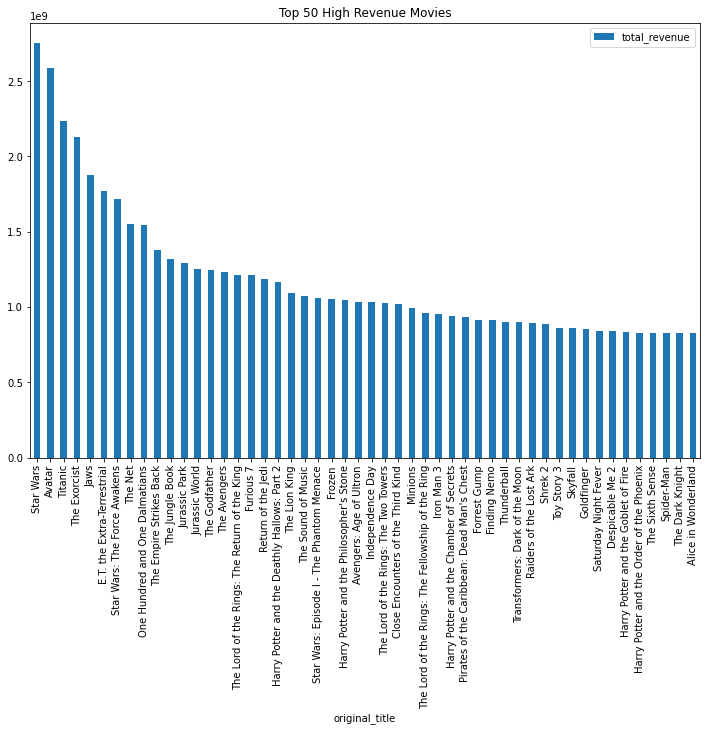

In [22]:
# Bar Chart Top 50 movies of high profit revenue
top_rev.plot(x='original_title', y='total_revenue', kind='bar', title = 'Top 50 High Revenue Movies', figsize=(12,8))

In [23]:
# value counts of production companies that produced high income revenue movies
top_rev['production_companies'].value_counts()

Lucasfilm|Twentieth Century Fox Film Corporation                                                              3
Universal Pictures|Illumination Entertainment                                                                 2
Universal Pictures|Amblin Entertainment                                                                       2
Columbia Pictures                                                                                             2
Eon Productions|Metro-Goldwyn-Mayer (MGM)                                                                     2
WingNut Films|New Line Cinema|The Saul Zaentz Company                                                         2
Marvel Studios                                                                                                2
Lucasfilm|Paramount Pictures                                                                                  1
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG                               

The movies that generated high revenues were **highly rated** and are of genres: **Action, Adventure, Fantasy, Science Fiction.** Most of the movies that generated high income were produced by **Lucasfilm, Twentieth Century Fox Film Corporation, Universal Pictures, Walt Disney, Paramount pictures, Columbia pictures** among others.